In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
from pathlib import Path
from zipfile import ZipFile
from io import BytesIO  
#import requests  
#import json  
#import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

In [3]:
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [4]:
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [5]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-e5e81556-000f-4d93-86d4-b60748f7fe20',
    'IBM_API_KEY_ID': 'aNSEN31wTP6yZ20pw5EHvlrvMRBa1wK97un-2eiazXn5',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstone-donotdelete-pr-5lsxokvrardkjz',
    'FILE': 'Neighborhoods.csv'
}

In [7]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#from geopy.geocoders import Nominatim
import json
#import fiona


In [8]:
!conda install geopandas --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                0         133 KB
    libnetcdf-4.4.1.1          |       h816af47_8         3.8 MB
    libboost-1.67.0            |       h46d08c1_4        20.9 MB
    munch-2.3.2                |           py35_0          13 KB
    poppler-data-0.4.9         |                0         3.5 MB
    geos-3.6.2                 |       heeff764_2         1.6 MB
    kealib-1.4.7               |       h79811e5_5         170 KB
    libspatialite-4.3.0a       |      h72746d6_18         3.1 MB
    descartes-1.1.0            |   py35h2f9c1c0_0           9 KB
    json-c-0.12.1              |       ha6a3662_2          50 KB
    pyproj-1.9.5.1             |           py35_0         3.3

In [9]:
import geopandas
#from arcgis.gis import GIS
#from arcgis.geocoding import Geocoder, get_geocoder, geocode

from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

from geopandas import GeoDataFrame

In [10]:
!conda install --channel conda-forge geoplot geopy ipywidgets nodejs --yes
import geoplot
import geopy
import ipywidgets

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geoplot
    - geopy
    - ipywidgets
    - nodejs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nodejs-11.14.0             |       he1b5a44_1        16.6 MB  conda-forge
    cartopy-0.16.0             |   py35h81b52dc_2         2.3 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geoplot-0.2.4              |             py_0          30 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    pyshp-2.1.0                |             py_0          31 KB  conda-forge
    widgetsnbextension-3.4.2   |           py35_0         1.7 MB  conda-forge
    openssl-1.0.2r             |       h14c3975

Download Portland Neighborhood GeoPandas

In [14]:
url = "https://opendata.arcgis.com/datasets/1ef75e34b8504ab9b14bef0c26cade2c_3.zip"
df_PDX = geopandas.read_file(url)

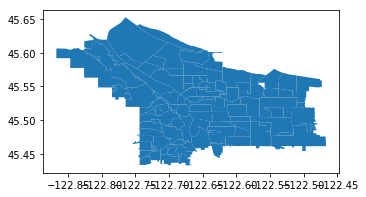

In [15]:
 df_PDX.plot(figsize=(10, 3))

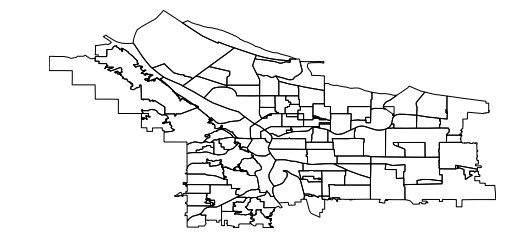

In [16]:
geoplot.polyplot(df_PDX, figsize=(8, 4))

Add Centroid to geopandas

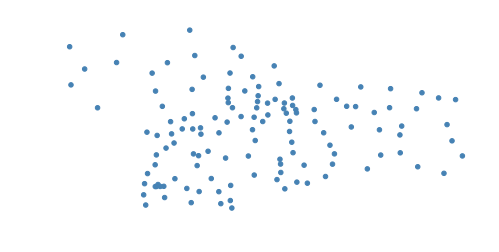

In [17]:
df_PDX['centroid_column'] = df_PDX.centroid
df_PDX = df_PDX.set_geometry('centroid_column')
geoplot.pointplot(df_PDX, figsize=(8, 4))

In [18]:
df_PDX.head()

,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,geometry,centroid_column
0,1,LINNTON,None,None,NWNW,HORZ,52741.719772,Linnton,POLYGON ((-122.8237089611819 45.60615857772244...,POINT (-122.7932636868732 45.60378993637904)
1,2,FOREST PARK/LINNTON,None,Y,NWNW,None,57723.635350,Forest Park/Linnton,POLYGON ((-122.8231909270121 45.60615651892255...,POINT (-122.7817746512876 45.58063023423168)
2,3,FOREST PARK,None,None,NWNW,HORZ,82222.098924,Forest Park,POLYGON ((-122.7558129418403 45.51954858251791...,POINT (-122.7922472760931 45.56412790016483)
3,4,CATHEDRAL PARK,None,None,NPNS,HORZ,11434.254777,Cathedral Park,"POLYGON ((-122.7646055108057 45.58518893125, -...",POINT (-122.7573167006587 45.58736826406707)
4,5,UNIVERSITY PARK,None,None,NPNS,HORZ,11950.859827,University Park,POLYGON ((-122.7385520535061 45.58394808045919...,POINT (-122.730079200974 45.57635375668904)


Write dataframe as csv and upload

In [19]:
df_PDX.to_csv(path_or_buf='df_PDX.csv', index=False )
p = Path('./')
list(file.name for file in p.glob('*'))

['OnPremise.csv', 'OLCC_Licenses.xls', 'df_PDX.csv', 'OLCC_Licenses.csv']

In [20]:
upload_file_cos (credentials_3,'df_PDX.csv','df_PDX.csv')

File Uploaded


Download Seattle Neighborhood GeoPandas

In [44]:
url = "https://opendata.arcgis.com/datasets/17418ff4986440dcb7058b1c6533e94b_384.zip"
df_SEA = geopandas.read_file(url)

In [55]:
df_SEA.head()

,OBJECTID,NEIGH_NUM,NEIGHBORHO,SHAPE_Leng,SHAPE_Area,geometry,centroid_column
0,1,37,University District,40436.205860,4.948493e+07,POLYGON ((-122.3189590288485 47.67250069638226...,POINT (-122.3083432983634 47.65974477809413)
1,2,38,Wallingford,32080.778300,4.210762e+07,"POLYGON ((-122.346114180476 47.66505276831814,...",POINT (-122.333074933286 47.6600056037032)
2,3,101,Interbay,59930.630161,3.372042e+07,"POLYGON ((-122.397942744914 47.66481700558359,...",POINT (-122.3810137208626 47.6415067002665)
3,4,227,West Campus - Fed Way,36341.429112,6.639272e+07,"POLYGON ((-122.348030734308 47.3151893486264, ...",POINT (-122.3317456456217 47.30427628594848)
4,5,245,Berkshire Glen,10597.297569,7.048653e+06,POLYGON ((-122.1764963769378 47.32992973688438...,POINT (-122.1710183904485 47.33329555183212)


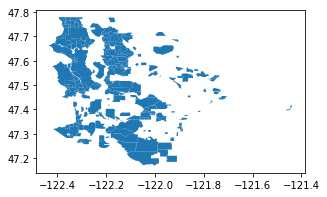

In [11]:
 df_SEA.plot(figsize=(10, 3))

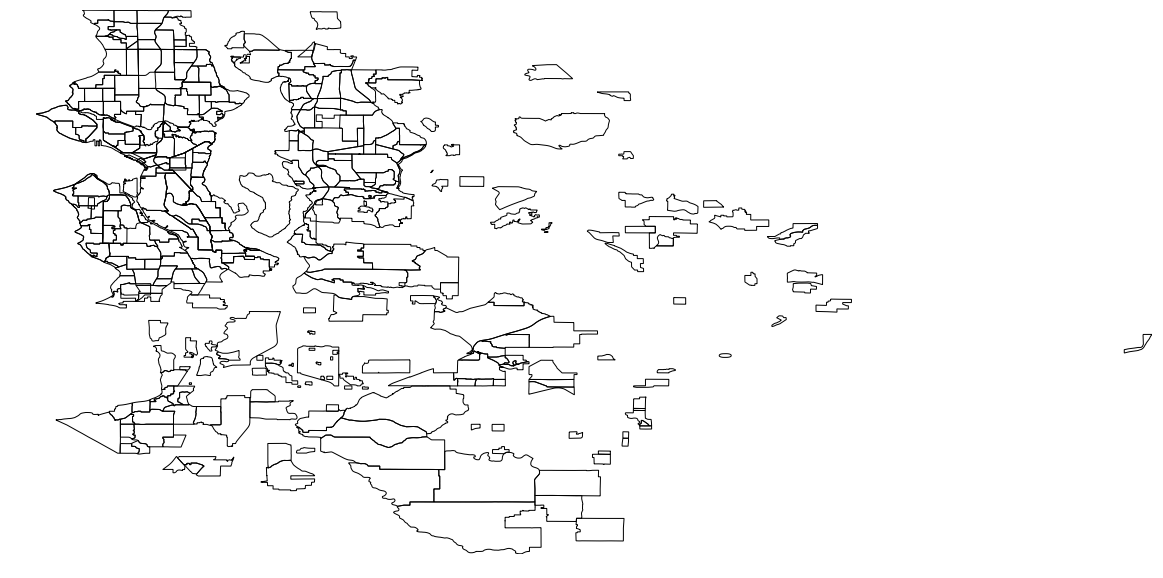

In [61]:
geoplot.polyplot(df_SEA, figsize=(20, 10))

Add Centroid to geopandas

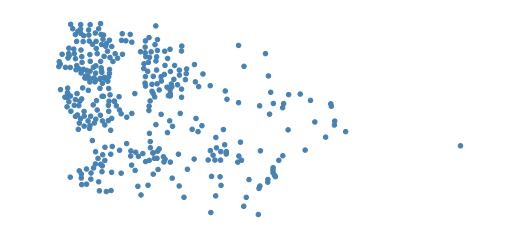

In [45]:
df_SEA['centroid_column'] = df_SEA.centroid
df_SEA = df_SEA.set_geometry('centroid_column')
geoplot.pointplot(df_SEA, figsize=(8, 4))

In [11]:
download_file_cos (credentials_3,"df_SEA.csv","df_SEA.csv")

File Downloaded


In [14]:
df_SEA = pd.read_csv("df_SEA.csv")
df_SEA.head()

,OBJECTID,NEIGH_NUM,NEIGHBORHO,SHAPE_Leng,SHAPE_Area,geometry,centroid_column
0,1,37,University District,40436.205860,4.948493e+07,POLYGON ((-122.3189590288485 47.67250069638226...,POINT (-122.3083432983634 47.65974477809413)
1,2,38,Wallingford,32080.778300,4.210762e+07,"POLYGON ((-122.346114180476 47.66505276831814,...",POINT (-122.333074933286 47.6600056037032)
2,3,101,Interbay,59930.630161,3.372042e+07,"POLYGON ((-122.397942744914 47.66481700558359,...",POINT (-122.3810137208626 47.6415067002665)
3,4,227,West Campus - Fed Way,36341.429112,6.639272e+07,"POLYGON ((-122.348030734308 47.3151893486264, ...",POINT (-122.3317456456217 47.30427628594848)
4,5,245,Berkshire Glen,10597.297569,7.048653e+06,POLYGON ((-122.1764963769378 47.32992973688438...,POINT (-122.1710183904485 47.33329555183212)


In [19]:
import fiona
#help(fiona.open)

In [46]:
df_SEA.dtypes

OBJECTID             int64
NEIGH_NUM            int64
NEIGHBORHO          object
SHAPE_Leng         float64
SHAPE_Area         float64
geometry            object
centroid_column     object
dtype: object

In [17]:
df_SEA.describe(include="all")

,OBJECTID,NEIGH_NUM,NEIGHBORHO,SHAPE_Leng,SHAPE_Area,geometry,centroid_column
count,350.000000,350.000000,350,350.000000,3.500000e+02,350,350
unique,NaN,NaN,346,NaN,NaN,350,350
top,NaN,NaN,High Point,NaN,NaN,POLYGON ((-122.3551986141567 47.49388230891311...,POINT (-122.3338335761616 47.46611157201158)
freq,NaN,NaN,2,NaN,NaN,1,1
mean,175.500000,175.831429,NaN,27694.059319,3.765886e+07,NaN,NaN
std,101.180532,100.905315,NaN,17965.080782,5.370615e+07,NaN,NaN
min,1.000000,1.000000,NaN,1641.134350,1.275994e+05,NaN,NaN
25%,88.250000,89.250000,NaN,16619.003663,1.158575e+07,NaN,NaN
50%,175.500000,175.500000,NaN,23499.962323,2.191253e+07,NaN,NaN
75%,262.750000,262.750000,NaN,33430.055982,3.846312e+07,NaN,NaN


In [18]:
p = Path('./')
list(file.name for file in p.glob('*'))

['df_SEA.csv']

In [20]:
download_file_cos (credentials_3,'WA_KING_merge.csv','WA_KING_merge.csv')

File Downloaded


In [21]:
WA_KING_merge = pd.read_csv("WA_KING_merge.csv")

In [22]:
WA_KING_merge.shape

(4152, 76)

In [23]:
pd.set_option('display.max_columns', 999)
WA_KING_merge.head()

,Unnamed: 0,Unnamed: 0_x,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,Unnamed: 0_y,0,address,attributes.AddBldg,attributes.AddNum,attributes.AddNumFrom,attributes.AddNumTo,attributes.AddRange,attributes.Addr_type,attributes.BldgName,attributes.BldgType,attributes.Block,attributes.City,attributes.Country,attributes.DisplayX,attributes.DisplayY,attributes.Distance,attributes.District,attributes.ExInfo,attributes.LangCode,attributes.LevelName,attributes.LevelType,attributes.Loc_name,attributes.LongLabel,attributes.Match_addr,attributes.MetroArea,attributes.Nbrhd,attributes.Phone,attributes.PlaceName,attributes.Place_addr,attributes.Postal,attributes.PostalExt,attributes.Rank,attributes.Region,attributes.RegionAbbr,attributes.ResultID,attributes.Score,attributes.Sector,attributes.ShortLabel,attributes.Side,attributes.StAddr,attributes.StDir,attributes.StName,attributes.StPreDir,attributes.StPreType,attributes.StType,attributes.Status,attributes.SubAddr,attributes.Subregion,attributes.Territory,attributes.Type,attributes.URL,attributes.UnitName,attributes.UnitType,attributes.X,attributes.Xmax,attributes.Xmin,attributes.Y,attributes.Ymax,attributes.Ymin,attributes.Zone,location.x,location.y,score
0,0,0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ...",129,"15321 MAIN ST NE STE 201 , DUVALL ...","15321 Main St NE, Duvall, Washington, 98019",NaN,15321,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Duvall,USA,-121.987161,47.739042,0,NaN,NaN,ENG,NaN,NaN,World,"15321 Main St NE, Duvall, WA, 98019, USA","15321 Main St NE, Duvall, Washington, 98019",Seattle Metro Area,NaN,NaN,NaN,"15321 Main St NE, Duvall, Washington, 98019",98019.0,8481.0,20.0,Washington,WA,129,100.0,NaN,15321 Main St NE,L,15321 Main St NE,NE,Main,NaN,NaN,St,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-121.986716,-121.986161,-121.988161,47.738966,47.740042,47.738042,NaN,-121.986716,47.738966,100.0
1,1,1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ...",42,"1404 34TH AVE , SEATTLE ...","1404 34th Ave, Seattle, Washington, 98122",NaN,1404,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Seattle,USA,-122.289133,47.613087,0,NaN,NaN,ENG,NaN,NaN,World,"1404 34th Ave, Seattle, WA, 98122, USA","1404 34th Ave, Seattle, Washington, 98122",Seattle Metro Area,Madrona,NaN,NaN,"1404 34th Ave, Seattle, Washington, 98122",98122,3334.0,20.0,Washington,WA,42,100.0,NaN,1404 34th Ave,R,1404 34th Ave,NaN,34th,NaN,NaN,Ave,M,NaN,King County,NaN,NaN,NaN,NaN,NaN,-122.289263,-122.288134,-122.290133,47.613085,47.614087,47.612087,NaN,-122.289263,47.613085,100.0
2,2,2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ...",42,"31217 124TH AVE SE STE 6 , AUBURN ...","31217 124th Ave SE, #6, Auburn, Washington, 98092",NaN,31217,NaN,NaN,NaN,Subaddress,NaN,NaN,NaN,Auburn,USA,-122.177034,47.321883,0,NaN,NaN,ENG,NaN,NaN,World,"31217 124th Ave SE, #6, Auburn, WA, 98092, USA","31217 124th Ave SE, #6, Auburn, Washington, 98092",Seattle Metro Area,Lea Hill,NaN,NaN,"31217 124th Ave SE, #6, Auburn, Washington, 98092",98092.0,901.0,20.0,Washington,WA,42,100.0,NaN,"31217 124th Ave SE, #6",L,31217 124th Ave SE,SE,124th,NaN,NaN,Ave,M,#6,King County,NaN,NaN,NaN,6,Ste,-122.176475,-122.176034,-122.178034,47.321882,47.322883,47.320883,NaN,-122.176475,47.321882,100.0
3,3,3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...",14,"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE Woodinville Duvall Rd, Woodinville, W...",NaN,14031,NaN,NaN,NaN,PointAddress,NaN,NaN,NaN,Woodinville,USA,-122.150813,47.753199,0,NaN,NaN,ENG,NaN,NaN,World,"14031 NE Woodinville Duvall Rd, Woodinville, W

In [21]:
WA_KING_merge.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Tradename', 'Loc Address', 'Loc City',
       'Loc St', 'Loc Zip', 'Business Startup Date', 'Privilege', 'County',
       'Status', 'Premises', 'Unnamed: 0_y', '0', 'address',
       'attributes.AddBldg', 'attributes.AddNum', 'attributes.AddNumFrom',
       'attributes.AddNumTo', 'attributes.AddRange', 'attributes.Addr_type',
       'attributes.BldgName', 'attributes.BldgType', 'attributes.Block',
       'attributes.City', 'attributes.Country', 'attributes.DisplayX',
       'attributes.DisplayY', 'attributes.Distance', 'attributes.District',
       'attributes.ExInfo', 'attributes.LangCode', 'attributes.LevelName',
       'attributes.LevelType', 'attributes.Loc_name', 'attributes.LongLabel',
       'attributes.Match_addr', 'attributes.MetroArea', 'attributes.Nbrhd',
       'attributes.Phone', 'attributes.PlaceName', 'attributes.Place_addr',
       'attributes.Postal', 'attributes.PostalExt', 'attributes.Rank',
       'attributes.Region', 'attribute

In [24]:
WA_KING_merge.drop(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 
       'attributes.AddBldg', 'attributes.AddNum', 'attributes.AddNumFrom',
       'attributes.AddNumTo', 'attributes.AddRange', 'attributes.Addr_type',
       'attributes.BldgName', 'attributes.BldgType', 'attributes.Block',
       'attributes.City', 'attributes.Country', 'attributes.DisplayX',
       'attributes.DisplayY', 'attributes.Distance', 'attributes.District',
       'attributes.ExInfo', 'attributes.LangCode', 'attributes.LevelName',
       'attributes.LevelType', 'attributes.Loc_name', 'attributes.LongLabel',
       'attributes.Match_addr', 
       'attributes.Phone', 'attributes.PlaceName', 'attributes.Place_addr',
       'attributes.Postal', 'attributes.PostalExt', 'attributes.Rank',
       'attributes.Region', 'attributes.RegionAbbr', 'attributes.ResultID',
       'attributes.Score', 'attributes.Sector', 'attributes.ShortLabel',
       'attributes.Side', 'attributes.StAddr', 'attributes.StDir',
       'attributes.StName', 'attributes.StPreDir', 'attributes.StPreType',
       'attributes.StType', 'attributes.Status', 'attributes.SubAddr',
       'attributes.Territory', 'attributes.Type',
       'attributes.URL', 'attributes.UnitName', 'attributes.UnitType',
       'attributes.X', 'attributes.Xmax', 'attributes.Xmin', 'attributes.Y',
       'attributes.Ymax', 'attributes.Ymin', 'attributes.Zone', 
       'score'], axis=1, inplace=True)

In [25]:
WA_KING_merge.shape

(4152, 17)

In [24]:
WA_KING_merge.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,0,address,attributes.MetroArea,attributes.Nbrhd,attributes.Subregion,location.x,location.y
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ...","15321 MAIN ST NE STE 201 , DUVALL ...","15321 Main St NE, Duvall, Washington, 98019",Seattle Metro Area,NaN,King County,-121.986716,47.738966
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ...","1404 34TH AVE , SEATTLE ...","1404 34th Ave, Seattle, Washington, 98122",Seattle Metro Area,Madrona,King County,-122.289263,47.613085
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ...","31217 124TH AVE SE STE 6 , AUBURN ...","31217 124th Ave SE, #6, Auburn, Washington, 98092",Seattle Metro Area,Lea Hill,King County,-122.176475,47.321882
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE Woodinville Duvall Rd, Woodinville, W...",Seattle Metro Area,Town Center,King County,-122.151612,47.754461
4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ...","18114 E VALLEY HWY , KENT ...","18114 E Valley Hwy, Kent, Washington, 98032",Seattle Metro Area,NaN,King County,-122.221090,47.439955


In [26]:
WA_KING_merge.rename(index=str, columns={'location.x': 'long', 'location.y': 'lat'},inplace=True)

In [27]:
WA_KING_merge.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,0,address,attributes.MetroArea,attributes.Nbrhd,attributes.Subregion,long,lat
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ...","15321 MAIN ST NE STE 201 , DUVALL ...","15321 Main St NE, Duvall, Washington, 98019",Seattle Metro Area,NaN,King County,-121.986716,47.738966
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ...","1404 34TH AVE , SEATTLE ...","1404 34th Ave, Seattle, Washington, 98122",Seattle Metro Area,Madrona,King County,-122.289263,47.613085
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ...","31217 124TH AVE SE STE 6 , AUBURN ...","31217 124th Ave SE, #6, Auburn, Washington, 98092",Seattle Metro Area,Lea Hill,King County,-122.176475,47.321882
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE Woodinville Duvall Rd, Woodinville, W...",Seattle Metro Area,Town Center,King County,-122.151612,47.754461
4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ...","18114 E VALLEY HWY , KENT ...","18114 E Valley Hwy, Kent, Washington, 98032",Seattle Metro Area,NaN,King County,-122.221090,47.439955


In [46]:
WA_KING_merge.dtypes

Tradename                 object
Loc Address               object
Loc City                  object
Loc St                    object
Loc Zip                    int64
Business Startup Date      int64
Privilege                 object
County                    object
Status                    object
Premises                  object
0                         object
address                   object
attributes.MetroArea      object
attributes.Nbrhd          object
attributes.Subregion      object
long                     float64
lat                      float64
dtype: object

In [28]:
geometry = [Point(xy) for xy in zip(WA_KING_merge["long"],WA_KING_merge["lat"] )]
crs = {'init': 'epsg:2285'} #http://www.spatialreference.org/ref/epsg/2285/
WA_gdf = GeoDataFrame(WA_KING_merge,crs=crs, geometry=geometry)

In [29]:
WA_gdf.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,0,address,attributes.MetroArea,attributes.Nbrhd,attributes.Subregion,long,lat,geometry
0,'AMONOS! MEXICAN KITCHEN,15321 MAIN ST NE STE 201,DUVALL,WA,980198574,20180327,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"15321 MAIN ST NE STE 201 , DUVALL ...","15321 MAIN ST NE STE 201 , DUVALL ...","15321 Main St NE, Duvall, Washington, 98019",Seattle Metro Area,NaN,King County,-121.986716,47.738966,POINT (-121.986715921 47.73896622800004)
1,/NA:M/ THAI CUISINE,1404 34TH AVE,SEATTLE,WA,981223334,20090608,SPIRITS/BR/WN REST LOUNGE +,KING,ACTIVE (ISSUED),"1404 34TH AVE , SEATTLE ...","1404 34TH AVE , SEATTLE ...","1404 34th Ave, Seattle, Washington, 98122",Seattle Metro Area,Madrona,King County,-122.289263,47.613085,POINT (-122.289262833 47.61308524000002)
2,00 PIZZA,31217 124TH AVE SE STE 6,AUBURN,WA,980923618,20121015,BEER/WINE REST - BEER/WINE,KING,ACTIVE (ISSUED),"31217 124TH AVE SE STE 6 , AUBURN ...","31217 124TH AVE SE STE 6 , AUBURN ...","31217 124th Ave SE, #6, Auburn, Washington, 98092",Seattle Metro Area,Lea Hill,King County,-122.176475,47.321882,POINT (-122.176474508 47.32188232900006)
3,028 BARBER SHOP,14031 NE WOODINVILLE DUVALL RD,WOODINVILLE,WA,980728504,20181115,SNACK BAR,KING,ACTIVE (ISSUED),"14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE WOODINVILLE DUVALL RD , WOODINVILLE ...","14031 NE Woodinville Duvall Rd, Woodinville, W...",Seattle Metro Area,Town Center,King County,-122.151612,47.754461,POINT (-122.151611714 47.75446148200007)
4,108 VIETNAMESE CAJUN CRAWFISH BROILER,18114 E VALLEY HWY,KENT,WA,980321001,20141105,BEER/WINE REST - BEER,KING,ACTIVE (ISSUED),"18114 E VALLEY HWY , KENT ...","18114 E VALLEY HWY , KENT ...","18114 E Valley Hwy, Kent, Washington, 98032",Seattle Metro Area,NaN,King County,-122.221090,47.439955,POINT (-122.221090239 47.43995479700003)


In [30]:
WA_gdf.describe()

,Loc Zip,Business Startup Date,long,lat
count,4.152000e+03,4.152000e+03,4152.000000,4152.000000
mean,9.740452e+08,2.010999e+07,-122.217185,47.578860
std,8.169360e+07,7.192711e+04,2.319010,0.232896
min,9.800200e+04,1.988112e+07,-123.220325,38.150090
25%,9.804500e+08,2.007041e+07,-122.340520,47.543293
50%,9.810400e+08,2.013102e+07,-122.316523,47.613699
75%,9.811817e+08,2.017032e+07,-122.206959,47.659666
max,9.840500e+08,2.019060e+07,16.566960,49.177480


In [31]:
missing_data = WA_gdf.isnull()
missing_data.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status,Premises,0,address,attributes.MetroArea,attributes.Nbrhd,attributes.Subregion,long,lat,geometry
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [32]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Tradename
False    4152
Name: Tradename, dtype: int64

Loc Address
False    4152
Name: Loc Address, dtype: int64

Loc City
False    4152
Name: Loc City, dtype: int64

Loc St
False    4152
Name: Loc St, dtype: int64

Loc Zip
False    4152
Name: Loc Zip, dtype: int64

Business Startup Date
False    4152
Name: Business Startup Date, dtype: int64

Privilege
False    4152
Name: Privilege, dtype: int64

County
False    4152
Name: County, dtype: int64

Status
False    4152
Name: Status, dtype: int64

Premises
False    4152
Name: Premises, dtype: int64

0
False    4152
Name: 0, dtype: int64

address
False    4152
Name: address, dtype: int64

attributes.MetroArea
False    4083
True       69
Name: attributes.MetroArea, dtype: int64

attributes.Nbrhd
False    3130
True     1022
Name: attributes.Nbrhd, dtype: int64

attributes.Subregion
False    4152
Name: attributes.Subregion, dtype: int64

long
False    4152
Name: long, dtype: int64

lat
False    4152
Name: lat, dtype: int64

geometry
False    4

In [35]:
#from scipy import stats
import seaborn as sns


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


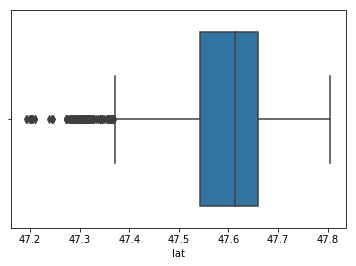

In [64]:
sns.boxplot(x=WA_gdf_1['lat'])

In [75]:
WA_gdf_1 = WA_gdf_1.drop(WA_gdf_1[(WA_gdf_1['lat'] >= 48.0) | (WA_gdf_1['lat'] <= 47.0) | (WA_gdf_1['long'] >= -121.6)].index)

In [72]:
WA_gdf_1 = WA_gdf.drop(WA_gdf[(WA_gdf['attributes.Subregion'] != 'King County')].index)

In [73]:
WA_gdf_1.shape

(4127, 18)

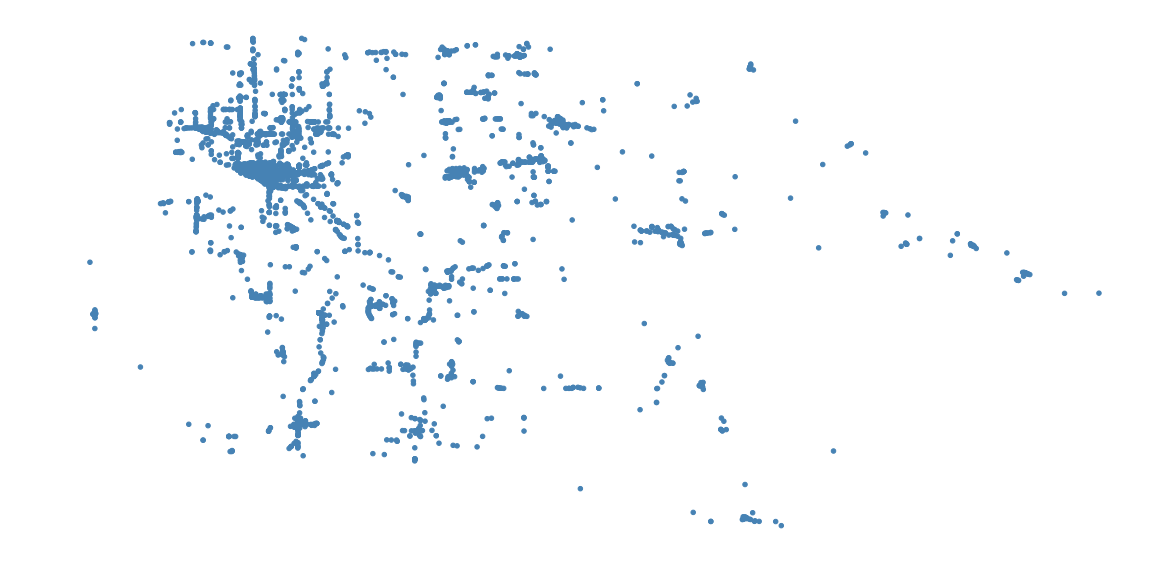

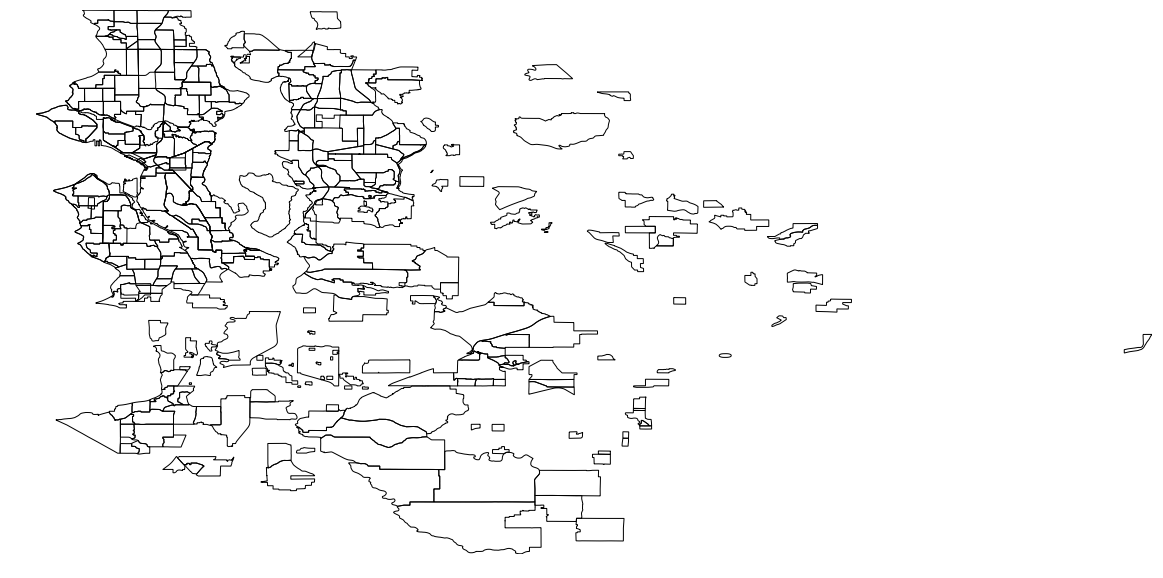

In [80]:
geoplot.pointplot(WA_gdf_1, figsize=(20, 10))
df_SEA = df_SEA.set_geometry('geometry')
geoplot.polyplot(df_SEA, figsize=(20, 10))

#ax = geoplot.kdeplot(WA_gdf,
#                     shade=True, shade_lowest=False,
#                     clip=df_SEA.geometry,
#                    linewidth=0)
#geoplot.polyplot(df_SEA, ax=ax)

#ax = geoplot.voronoi(
#    WA_gdf,
#    hue='Alcohol', 
#    cmap='Reds', scheme='fisher_jenks',
#    clip=df_SEA.geometry,
#    linewidth=0)
#geoplot.polyplot(df_SEA, ax=ax)

#base = df_SEA.plot(color='white', edgecolor='black')
#WA_gdf_1.plot(ax=base, marker='o', color='red', markersize=5);

In [85]:
WA_gdf_1.to_file("WA_gdf_1.geojson", driver="GeoJSON")
#df_SEA.to_file("df_SEA.json", driver="GeoJSON")

#WA_gdf_1.to_file("WA_gdf_1.shp")
#df_SEA.to_file("df_SEA.shp")
p = Path('./')
list(file.name for file in p.glob('*'))

['WA_gdf_1.shp',
 'df_SEA.dbf',
 'df_SEA.cpg',
 'WA_KING_merge.csv',
 'WA_gdf_1.geojson',
 'df_SEA.shp',
 'WA_gdf_1.cpg',
 'WA_gdf_1.prj',
 'df_SEA.json',
 'df_SEA.csv',
 'df_SEA.prj',
 'WA_gdf_1.dbf',
 'WA_gdf_1.json',
 'WA_gdf_1.shx',
 'df_SEA.shx']

In [84]:
list(file.name for file in p.glob('*'))

['WA_gdf_1.shp',
 'df_SEA.dbf',
 'df_SEA.cpg',
 'WA_KING_merge.csv',
 'df_SEA.shp',
 'WA_gdf_1.cpg',
 'WA_gdf_1.prj',
 'df_SEA.json',
 'df_SEA.csv',
 'df_SEA.prj',
 'WA_gdf_1.dbf',
 'WA_gdf_1.json',
 'WA_gdf_1.shx',
 'df_SEA.shx']

In [86]:
upload_file_cos (credentials_3,'WA_gdf_1.geojson','WA_gdf_1.geojson')

File Uploaded


In [42]:
WA_KING.shape

(3999, 9)

In [43]:
WA_KING.Privilege.unique()

array(['BEER/WINE REST - BEER/WINE         ',
       'SPIRITS/BR/WN REST LOUNGE +        ',
       'SNACK BAR                          ',
       'BEER/WINE REST - BEER              ',
       'SPIRITS/BR/WN REST LOUNGE -        ',
       'BEER/WINE REST-BEER/WINE W/TAPROOM ',
       'SPIRITS/BR/WN REST SERVICE BAR     ',
       'HOTEL                              ',
       'SPORTS ENTERTAINMENT FACILITY      ',
       'NIGHTCLUB                          ',
       'BEER/WINE THEATER                  ',
       'SPIRITS/BR/WN REST AIRPORT BAR +   ',
       'TAVERN - WINE                      ',
       'PRIVATE CLUB - SPIRITS/BEER/WINE   ',
       'SPIRITS/BR/WN REST LOUNGE + SEAS   ',
       'BEER/WINE REST - WINE              ',
       'TAVERN - BEER/WINE                 ',
       'BEER/WINE REST-BEER/WINE CONCESSION',
       'SPIRITS/BR/WN REST NONPUBLIC -     ',
       'SPIRITS/BR/WN REST CONVENTION CTR -',
       'SPIRITS/BEER/WINE THEATER          ',
       'PRIVATE CLUB - BEER/WINE  

In [44]:
!wget -O OLCC_Licenses.xls http://www.olcc.state.or.us/pdfs/licenses_by_type_excel.xls
ORLicenses = pd.read_excel("OLCC_Licenses.xls", skiprows=8)
ORLicenses.head()

--2019-05-20 20:44:47--  http://www.olcc.state.or.us/pdfs/licenses_by_type_excel.xls
Resolving www.olcc.state.or.us (www.olcc.state.or.us)... 159.121.27.4
Connecting to www.olcc.state.or.us (www.olcc.state.or.us)|159.121.27.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7064064 (6.7M) [application/vnd.ms-excel]
Saving to: ‘OLCC_Licenses.xls’

100%[======================================>] 7,064,064   1.11MB/s   in 6.3s   

2019-05-20 20:44:54 (1.07 MB/s) - ‘OLCC_Licenses.xls’ saved [7064064/7064064]



,License No.,Premises No.,Effective Date,Expiration,Tradename,Licensee Name,Type,License Action,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip,Prem Phone,Mailing Address,Mailing City,Mail State,Mail Zip,Second Location to License No.
0,288152,28426,2019-04-01,2020-03-31,#1 FOOD 4 MART,FUN 4 U INC,O,NaN,729 SW 185TH,ALOHA,WASHINGTON,OR,97006,503-502-9271,PO BOX 5026,BEAVERTON,OR,97006,NaN
1,291855,58406,2019-04-11,2020-03-31,00 WINES,00 OREGON LLC,WY,NaN,801 N SCOTT ST,CARLTON,YAMHILL,OR,97111,503-852-6100,937 NW GLISAN ST #1037,PORTLAND,OR,97209,NaN
2,283185,51973,2019-01-01,2019-12-31,1 800 WINESHOP.COM,1 800 WINESHOP.COM INC,DS,NaN,525 AIRPARK RD,NAPA,OUTSIDE OR,CA,94558,800-946-3746,NaN,NaN,OR,NaN,NaN
3,275587,4346,2018-07-01,2019-06-30,1 AM MARKET,1 AM MARKET INC,O,NaN,320 N MAIN ST,RIDDLE,DOUGLAS,OR,97469,541-874-2722,PO BOX 46,RIDDLE,OR,97469,NaN
4,275588,4379,2018-07-01,2019-06-30,1 AM MARKET,1 AM MARKET INC,O,NaN,1931 NE STEPHENS,ROSEBURG,DOUGLAS,OR,97470,541-673-0554,PO BOX 46,RIDDLE,OR,97469,NaN


In [45]:
ORLicenses.shape

(18080, 19)

In [46]:
ORLicenses.columns

Index(['License No.', 'Premises No.', 'Effective Date', 'Expiration',
       'Tradename', 'Licensee Name', 'Type', 'License Action',
       'Premises Street Address', 'Premises City', 'Prem County', 'Prem State',
       'Prem Zip', 'Prem Phone', 'Mailing Address', 'Mailing City',
       'Mail State', 'Mail Zip', 'Second Location to License No.'],
      dtype='object')

In [47]:
ORLicenses.drop(['License No.', 'Premises No.', 'Effective Date', 'Expiration',
        'Licensee Name',  'License Action',
        'Prem Phone', 'Mailing Address', 'Mailing City',
       'Mail State', 'Mail Zip', 'Second Location to License No.'], axis=1, inplace=True)

In [48]:
ORLicenses.head()

,Tradename,Type,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip
0,#1 FOOD 4 MART,O,729 SW 185TH,ALOHA,WASHINGTON,OR,97006
1,00 WINES,WY,801 N SCOTT ST,CARLTON,YAMHILL,OR,97111
2,1 800 WINESHOP.COM,DS,525 AIRPARK RD,NAPA,OUTSIDE OR,CA,94558
3,1 AM MARKET,O,320 N MAIN ST,RIDDLE,DOUGLAS,OR,97469
4,1 AM MARKET,O,1931 NE STEPHENS,ROSEBURG,DOUGLAS,OR,97470


In [49]:
OR_MULTNOMAH = ORLicenses.loc[ORLicenses['Prem County'] == "MULTNOMAH"]
OR_MULTNOMAH.head()

,Tradename,Type,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip
7,10 BARREL BREWING COMPANY,BRW,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209
11,10 BARREL BREWING COMPANY,F-COM,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209
18,102ND STREET MARKET #1,O,4646 NE 102ND AVE,PORTLAND,MULTNOMAH,OR,97220
19,108 BAR & GRILL,F-COM,10845 NE HALSEY ST,PORTLAND,MULTNOMAH,OR,97213
20,10TH AVE LIQUOR STORE,O,925 SW 10TH AVE,PORTLAND,MULTNOMAH,OR,97205


In [50]:
OR_MULTNOMAH.shape

(3763, 7)

Extracted from https://www.oregon.gov/olcc/LIC/docs/license_types.pdf
"BRW", "BRWNC", "BP", "DIST","DISTT","F-COM","F_FPC", "F_CLU", "F_PL","F-PC", "GSP","GSPNC","L", "WY","WYNC"
"Brewery", "Brewery", "Brewery-Public House", "Distillery","Distillery Tasting","Full On-Premises Sales, Commercial","Full On-Premises Sales, For-Profit Private Club", "Full On-Premises Sales, Nonprofit Private Club", "Full On-Premises Sales, Other Public Location","Full On-Premises Sales, Public Passenger Carrier", "Grower Sales Privilege","Grower Sales Privilege","Limited On-Premises Sales","Winery","Winery",

In [51]:
# intialise data of lists. 
data = {'LicenseCode':["BRW", "BRWNC", "BP", "DIST","DISTT","F-COM","F_FPC", "F_CLU", "F_PL","F-PC", "GSP","GSPNC","L", "WY","WYNC"],
        'LicenseType':["Brewery", "Brewery", "Brewery-Public House", "Distillery","Distillery Tasting","Full On-Premises Sales, Commercial",
                       "Full On-Premises Sales, For-Profit Private Club", "Full On-Premises Sales, Nonprofit Private Club", 
                       "Full On-Premises Sales, Other Public Location","Full On-Premises Sales, Public Passenger Carrier", 
                       "Grower Sales Privilege","Grower Sales Privilege","Limited On-Premises Sales","Winery","Winery"]} 
  
# Create DataFrame 
OR_Type = pd.DataFrame(data) 
  
# Print the output. 
OR_Type

,LicenseCode,LicenseType
0,BRW,Brewery
1,BRWNC,Brewery
2,BP,Brewery-Public House
3,DIST,Distillery
4,DISTT,Distillery Tasting
5,F-COM,"Full On-Premises Sales, Commercial"
6,F_FPC,"Full On-Premises Sales, For-Profit Private Club"
7,F_CLU,"Full On-Premises Sales, Nonprofit Private Club"
8,F_PL,"Full On-Premises Sales, Other Public Location"
9,F-PC,"Full On-Premises Sales, Public Passenger Carrier"


In [52]:
dfToList = OR_Type['LicenseCode'].tolist()
dfToList

['BRW',
 'BRWNC',
 'BP',
 'DIST',
 'DISTT',
 'F-COM',
 'F_FPC',
 'F_CLU',
 'F_PL',
 'F-PC',
 'GSP',
 'GSPNC',
 'L',
 'WY',
 'WYNC']

In [53]:
# df['countries'].isin(c1)
OR_MULTNOMAH_Type = OR_MULTNOMAH.loc[OR_MULTNOMAH['Type'].isin (dfToList)]
OR_MULTNOMAH_Type.head()

,Tradename,Type,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip
7,10 BARREL BREWING COMPANY,BRW,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209
11,10 BARREL BREWING COMPANY,F-COM,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209
19,108 BAR & GRILL,F-COM,10845 NE HALSEY ST,PORTLAND,MULTNOMAH,OR,97213
33,13 VIRTUES BREWING CO,BP,6410 SE MILWAUKIE AVE,PORTLAND,MULTNOMAH,OR,97202
38,15TH AVENUE HOPHOUSE,F-COM,1517 NE BRAZEE,PORTLAND,MULTNOMAH,OR,97212


In [54]:
OR_MULTNOMAH_Type['Premises'] = OR_MULTNOMAH_Type['Premises Street Address'].astype(str) + ' , ' +  OR_MULTNOMAH_Type['Premises City'] + ' , ' + OR_MULTNOMAH_Type['Prem State']

In [55]:
OR_MULTNOMAH_Type.head()

,Tradename,Type,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip,Premises
7,10 BARREL BREWING COMPANY,BRW,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209,"1411 NW FLANDERS , PORTLAND , OR"
11,10 BARREL BREWING COMPANY,F-COM,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209,"1411 NW FLANDERS , PORTLAND , OR"
19,108 BAR & GRILL,F-COM,10845 NE HALSEY ST,PORTLAND,MULTNOMAH,OR,97213,"10845 NE HALSEY ST , PORTLAND , OR"
33,13 VIRTUES BREWING CO,BP,6410 SE MILWAUKIE AVE,PORTLAND,MULTNOMAH,OR,97202,"6410 SE MILWAUKIE AVE , PORTLAND , OR"
38,15TH AVENUE HOPHOUSE,F-COM,1517 NE BRAZEE,PORTLAND,MULTNOMAH,OR,97212,"1517 NE BRAZEE , PORTLAND , OR"


In [76]:
import urllib

In [78]:
urllib.request.urlopen('http://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/findAddressCandidates?singleLine=1411%20NW%20FLANDERS%20,%20PORTLAND%20,%20OR&forStorage=true&token=VEKg7UqnHwhBfE5zWPbk05VcwC32hEmlS4LSox6p3TCPndH_tF-sU7kOUjQpQ-6qBIVGO2ZgEyI8sprGVqCF8ivLkiS_qXAacs0e89QtSxikVH6mELrQYM2pV78r5cVRYgiDiQ9twvUJGWP9V1r4Ww..&f=pjson')

In [68]:
from shapely.geometry import Point, Polygon
OR_Geo_Stuff = geopandas.GeoDataFrame()
#geolocator = arcgis(token='VEKg7UqnHwhBfE5zWPbk05VcwC32hEmlS4LSox6p3TCPndH_tF-sU7kOUjQpQ-6qBIVGO2ZgEyI8sprGVqCF8ivLkiS_qXAacs0e89QtSxikVH6mELrQYM2pV78r5cVRYgiDiQ9twvUJGWP9V1r4Ww..')
#OR_MULTNOMAH_Type['geo_stuff'] = OR_MULTNOMAH_Type['Premises'].apply(geolocator.geocode)
#OR_MULTNOMAH_Type['geo_stuff'] = geopandas.tools.geocode(OR_MULTNOMAH_Type.Premises, provider='arcgis')

In [69]:
OR_Geo_Stuff['geometry'] = None

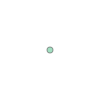

In [70]:
coordinates =  [(45.525787500432685, -122.68578149999999)]
point = Point(coordinates)
point

In [71]:
OR_Geo_Stuff.loc[0, 'geometry'] = point
OR_Geo_Stuff

,geometry
0,POINT (45.52578750043268 -122.6857815)


In [72]:
OR_Geo_Stuff.loc[0, 'Location'] = '1411 NW Flanders St, Portland, Oregon, 97209'

In [73]:
OR_Geo_Stuff

,geometry,Location
0,POINT (45.52578750043268 -122.6857815),"1411 NW Flanders St, Portland, Oregon, 97209"


In [74]:
from fiona.crs import from_epsg

In [75]:
OR_Geo_Stuff.crs = from_epsg(4326)
OR_Geo_Stuff.crs

{'init': 'epsg:4326', 'no_defs': True}

In [81]:
OR_Geo_Stuff2 = geopandas.GeoDataFrame()
OR_Geo_Stuff2 = geopandas.tools.geocode(OR_MULTNOMAH_Type.Premises, provider='arcgis', token = 'ssWxtNZgSTMSNooy7CyjUUWD3XsZAOEJLVUwwucPbddBEMHUW7lSnV2wClBQ-6JC6T3T_vnoVZghAIANjtDqwa6078-43wA-l11hy6Zmi0WfV6H9t_uKPfIERqwBDffpQctUPzhamVdqEKxKfXPDkA..')

TypeError: __init__() got an unexpected keyword argument 'token'

https://www.arcgis.com/sharing/oauth2/token?client_id=EX7q4WxfLuHJ4Kee&grant_type=client_credentials&client_secret=e044da2b14474738ba59457660b7f47a&f=pjson
refresh token
http://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/findAddressCandidates?singleLine=1411%20NW%20FLANDERS%20,%20PORTLAND%20,%20OR&forStorage=true&token=VEKg7UqnHwhBfE5zWPbk05VcwC32hEmlS4LSox6p3TCPndH_tF-sU7kOUjQpQ-6qBIVGO2ZgEyI8sprGVqCF8ivLkiS_qXAacs0e89QtSxikVH6mELrQYM2pV78r5cVRYgiDiQ9twvUJGWP9V1r4Ww..&f=pjson
query

In [84]:
Geocoder_url = "https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer"
gis = GIS(Geocoder_url, "EX7q4WxfLuHJ4Kee", "e044da2b14474738ba59457660b7f47a")
get_geocoders(gis)

RuntimeError: Access not allowed request
(Error Code: 403)

In [86]:
results = geocode('1411 NW FLANDERS , PORTLAND , OR')
# query the first matched result
results[0]['location']

{'x': -122.68578149999999, 'y': 45.525787500432685}

In [94]:
#OR_MULTNOMAH_Type['geo_stuff'] = geocode[OR_MULTNOMAH_Type.Premises]
firststring = OR_MULTNOMAH_Type['Premises'].iloc[0]
#firstrow = geocode[firststring]
#firstrow
firststring

'1411 NW FLANDERS , PORTLAND , OR'

In [87]:
OR_MULTNOMAH_Type.head()

,Tradename,Type,Premises Street Address,Premises City,Prem County,Prem State,Prem Zip,Premises
7,10 BARREL BREWING COMPANY,BRW,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209,"1411 NW FLANDERS , PORTLAND , OR"
11,10 BARREL BREWING COMPANY,F-COM,1411 NW FLANDERS,PORTLAND,MULTNOMAH,OR,97209,"1411 NW FLANDERS , PORTLAND , OR"
19,108 BAR & GRILL,F-COM,10845 NE HALSEY ST,PORTLAND,MULTNOMAH,OR,97213,"10845 NE HALSEY ST , PORTLAND , OR"
33,13 VIRTUES BREWING CO,BP,6410 SE MILWAUKIE AVE,PORTLAND,MULTNOMAH,OR,97202,"6410 SE MILWAUKIE AVE , PORTLAND , OR"
38,15TH AVENUE HOPHOUSE,F-COM,1517 NE BRAZEE,PORTLAND,MULTNOMAH,OR,97212,"1517 NE BRAZEE , PORTLAND , OR"
